In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import h5py as h5
import psana

In [3]:
# Load the h5 file
#with h5.File("/sdf/data/lcls/ds/xpp/xppl1001021/hdf5/smalldata/xppl1001021_Run0024.h5", 'r') as sourceFile:
#    names = list(sourceFile['/Sums'].keys())
#    for name in names:
#        print(name)

    #epix5= np.array(sourceFile['/Sums/epix_alc5_calib'])
    
    #elayStageLocation = np.array(sourceFile['/epicsAll/sd_delay'])

In [4]:
exp_name = "xppl1001021"
run_num = 24
det_name = "epix_alc5"

ds = psana.DataSource('exp={}:run={}'.format(exp_name, run_num))
env = ds.env()
det = psana.Detector(det_name, env)

numberToLoad = 100
counter = 0

for evt in ds.events():
    
    if counter == 0 :
        holder = det.calib(evt)
    else:
        holder += det.calib(evt)
        
    counter += 1
    if counter >= numberToLoad:
        break

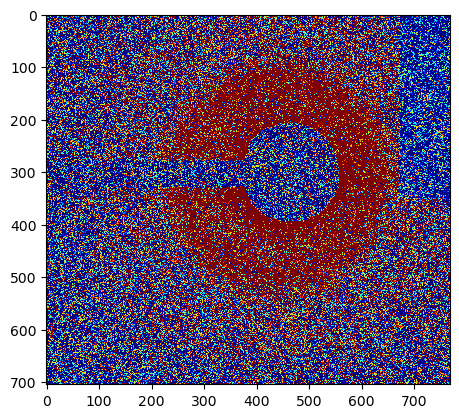

In [6]:
plt.imshow(holder, vmax=2, vmin=0, cmap='jet')
plt.show()

In [8]:
mask = np.zeros_like(holder, dtype=bool)
mask[100:200, 300:500] = True
mask[400:500, 300:500] = True

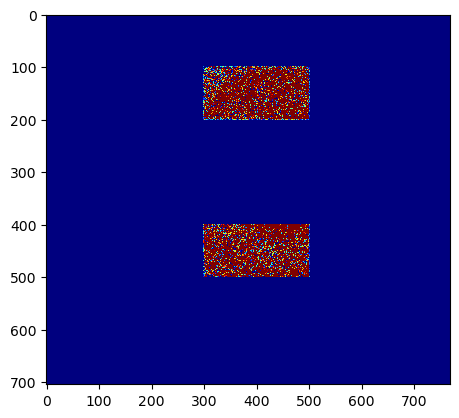

In [9]:
plt.imshow(holder * mask, vmax=2, vmin=0, cmap='jet')
plt.show()

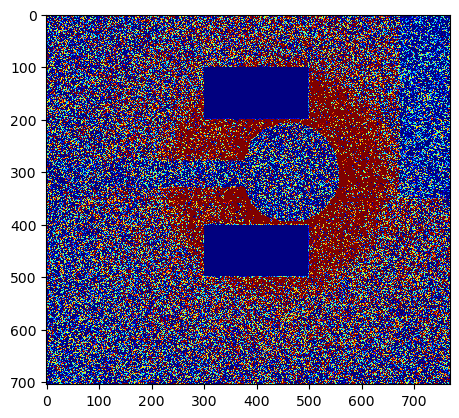

In [10]:
plt.imshow(holder * np.logical_not(mask), vmax=2, vmin=0, cmap='jet')
plt.show()

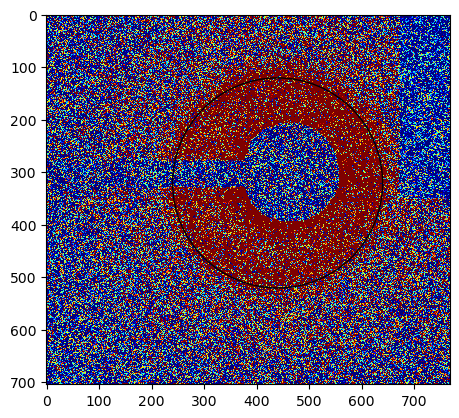

In [25]:
circle = mpat.Circle((440, 320), 200, fill=False)

fig, ax = plt.subplots()
ax.imshow(holder, vmax=2, vmin=0, cmap='jet')
ax.add_patch(circle)
plt.show()

In [83]:
pixel_positions = np.zeros((holder.shape[0], holder.shape[1], 2))
pixel_positions[:,:,0] = (np.arange(holder.shape[0]) - 305)[:, np.newaxis]
pixel_positions[:,:,1] = (np.arange(holder.shape[1]) - 460)[np.newaxis, :]
pixel_positions = np.sqrt(np.sum(np.square(pixel_positions), axis=-1))

In [98]:
mask_new = np.zeros_like(pixel_positions, dtype=bool)
mask_new[np.logical_and(pixel_positions < 230, pixel_positions>120)] = True
mask_new[255:345, :400] = False
mask_new[:, 660:] = False

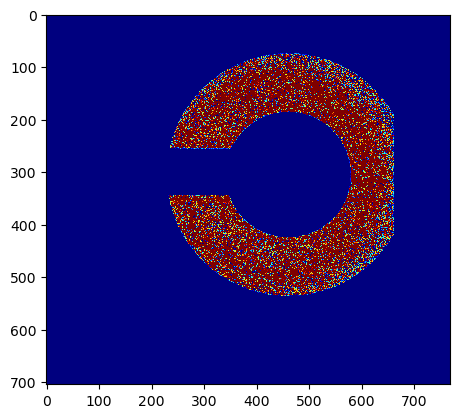

In [99]:
plt.imshow(holder * mask_new, vmin=0, vmax=2, cmap='jet')
plt.show()

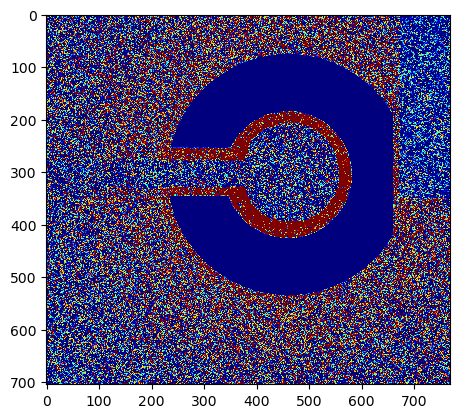

In [100]:
plt.imshow(holder * np.logical_not(mask_new), vmin=0, vmax=2, cmap='jet')
plt.show()

In [101]:
np.save("../droplet_mask_2023_11_02_10_36.npy", mask_new)

In [102]:
mask_ROI = np.zeros_like(pixel_positions, dtype=bool)
mask_ROI[np.logical_and(pixel_positions < 225, pixel_positions>125)] = True
mask_ROI[250:350, :400] = False
mask_ROI[:, 655:] = False

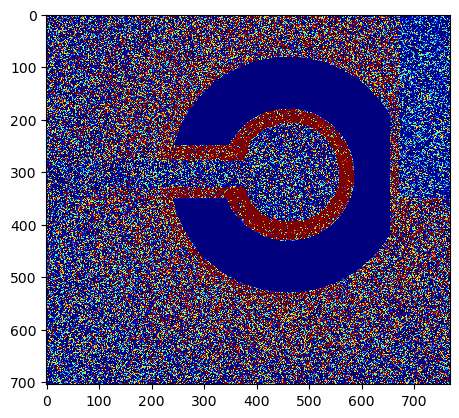

In [103]:
plt.imshow(holder * np.logical_not(mask_ROI), vmin=0, vmax=2, cmap='jet')
plt.show()

In [104]:
np.save("../droplet_mask_ROI_2023_11_02_10_36.npy", mask_ROI)

In [105]:
pwd

'/sdf/data/lcls/ds/xpp/xppl1001021/results/haoyuan'

In [ ]:
/sdf/data/lcls/ds/xpp/xppl1001021/results/droplet_mask_2023_11_02_10_36.npy